In [1]:
require(readr)
require(agricolae)
require(car)
require(gvlma)
require(ggplot2)
require(rcompanion)
require(DescTools)
require(MASS)

Loading required package: readr
Warning message:
"package 'readr' was built under R version 3.6.3"Loading required package: agricolae
Loading required package: car
Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"Loading required package: gvlma
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Loading required package: rcompanion
Loading required package: DescTools
Warning message:
"package 'DescTools' was built under R version 3.6.3"
Attaching package: 'DescTools'

The following object is masked from 'package:car':

    Recode

Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.3"

In [2]:
#require(readr)
CRD <- read_csv("CRD.csv")


-- Column specification --------------------------------------------------------
cols(
  trt = col_double(),
  value = col_double()
)



In [3]:
attach(CRD)

In [4]:
names(CRD)

[1] "trt"   "value"

In [5]:
head(CRD)

trt,value
<dbl>,<dbl>
1,850.50
1,453.60
1,878.85
1,623.70
1,510.30
1,765.45


In [6]:
require(repr)
options(repr.plot.width=4, repr.plot.height=4)

Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.6.3"

In [7]:
summary(CRD$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  368.6   538.6   623.7   679.5   793.8  1474.2 

In [8]:
trt=as.factor(CRD$trt)

In [9]:
model=lm(value~CRD$trt)
gvmodelfit1=gvlma(model)
gvmodelfit1


Call:
lm(formula = value ~ CRD$trt)

Coefficients:
(Intercept)      CRD$trt  
     590.15        44.65  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model) 

                    Value   p-value                   Decision
Global Stat        24.979 0.0000508 Assumptions NOT satisfied!
Skewness           12.676 0.0003704 Assumptions NOT satisfied!
Kurtosis            5.872 0.0153867 Assumptions NOT satisfied!
Link Function       4.538 0.0331458 Assumptions NOT satisfied!
Heteroscedasticity  1.893 0.1688297    Assumptions acceptable.

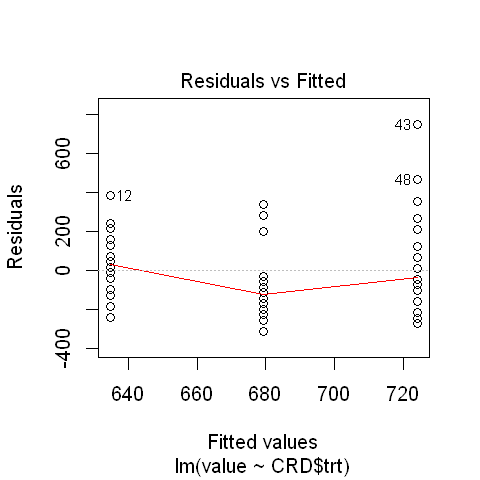

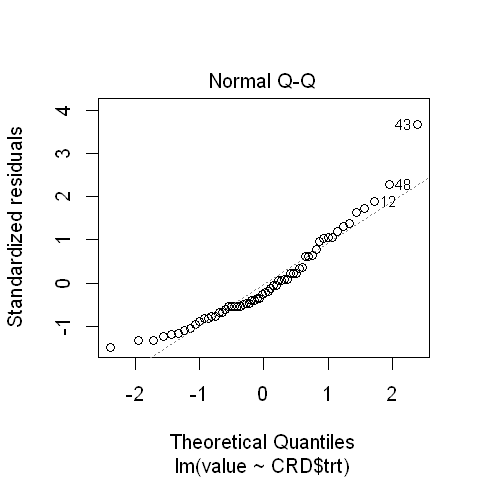

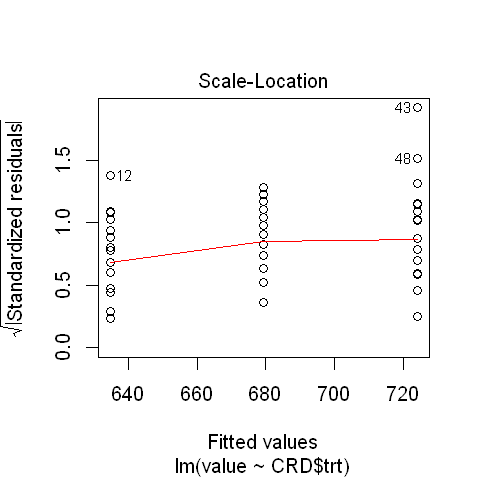

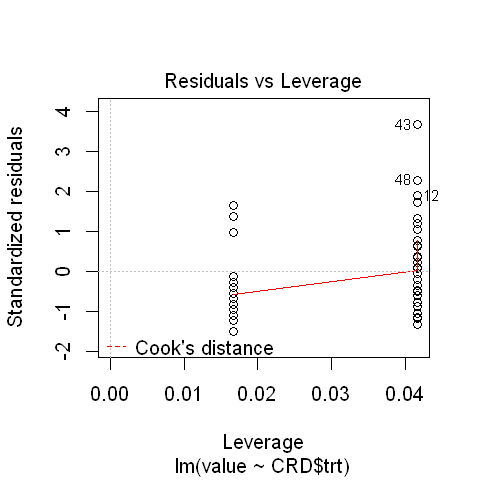

In [10]:
a=plot(model)

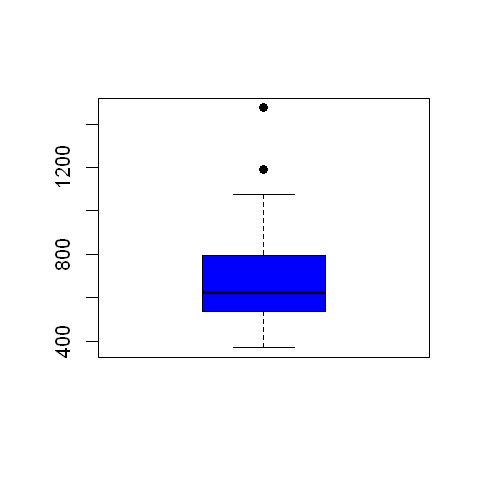

In [11]:
boxplot(value, pch=19, col="blue")

## finding out outliers

In [12]:
boxplot.stats(CRD$value)$out


[1] 1474.2 1190.7

## finding out the the position of outlier in the column

In [13]:
out <- boxplot.stats(CRD$value)$out
out_ind <- which(CRD$value %in% c(out))
out_ind

[1] 43 48

### for detection of outliers 

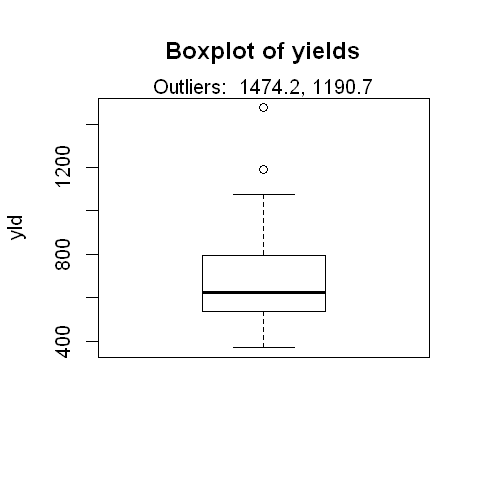

In [14]:
boxplot(CRD$value,
        ylab = "yld",
        main = "Boxplot of yields"
)
mtext(paste("Outliers: ", paste(out, collapse = ", ")))

In [15]:
durbinWatsonTest(model) # to test auto correlation and heteroescadiscity

 lag Autocorrelation D-W Statistic p-value
   1       0.1028152      1.766214    0.28
 Alternative hypothesis: rho != 0

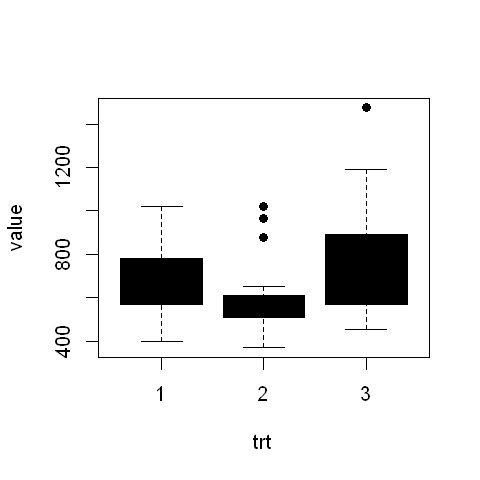

In [16]:
plot(value~trt,pch = 19, col = "black")

------------------------------------------------------------------------------ 
CRD$value (numeric)

      length         n       NAs    unique        0s      mean      meanCI'
          60        60         0        25         0  679.4550    625.1341
                100.0%      0.0%                0.0%              733.7759
                                                                          
         .05       .10       .25    median       .75       .90         .95
    452.1825  453.6000  538.6500  623.7000  793.8000  966.7350  1'023.4350
                                                                          
       range        sd     vcoef       mad       IQR      skew        kurt
  1'105.6500  210.2795    0.3095  168.1268  255.1500    1.2811      1.9981
                                                                          
lowest : 368.55, 396.9, 425.25, 453.6 (4), 481.95 (2)
highest: 992.25, 1'020.6000 (2), 1'077.3000, 1'190.7000, 1'474.2000

heap(?): remarkable frequ

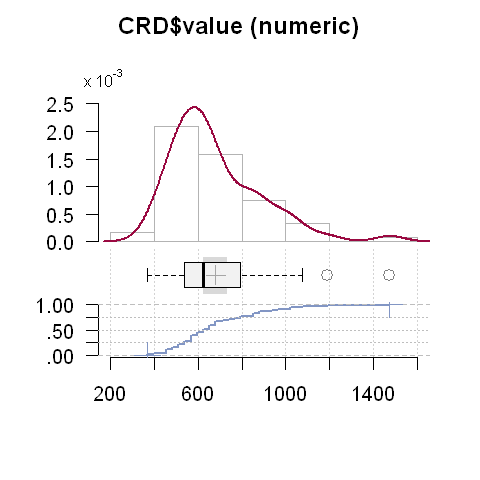

In [17]:
Desc(CRD$value) 

 ### p-value for shapiro-Wilk test/test of normality if it is below 0.05, 
## the data significantly deviate from a normal distribution



In [18]:
shapiro.test(CRD$value) 


	Shapiro-Wilk normality test

data:  CRD$value
W = 0.90274, p-value = 0.0001658


#### The Kolmogorov-Smirnov test and the Shapiro-Wilk's W test are more sensitive 
#### whether the underlying distribution is normal.

### Visualization for testing normality using histogram and density plots however, 
#### shapiro.wilk test is more sensitive for testing normality 


In [ ]:
#LeveneTest(CRD$value~trt, data=CRD,center=mean)

#### Levene's test is not appropriate with quantitative explanatory variables.

In [19]:
bartlett.test(value~trt)


	Bartlett test of homogeneity of variances

data:  value by trt
Bartlett's K-squared = 6.8697, df = 2, p-value = 0.03223


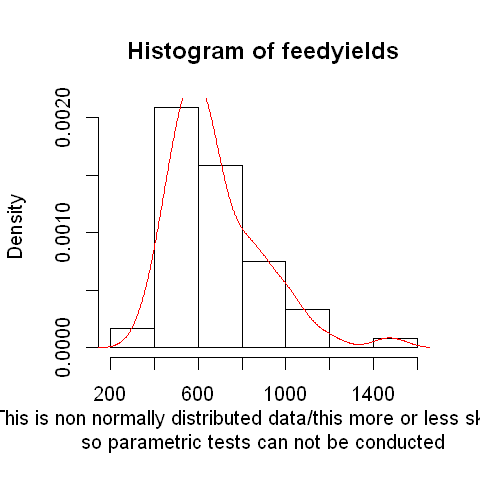

In [20]:
hist(CRD$value,probability=T, main="Histogram of feedyields",xlab=" This is non normally distributed data/this more or less skewed 
so parametric tests can not be conducted")
lines(density(value),col=2)

#### Add a line where x = y to help assess how closely the scatter fits the line.

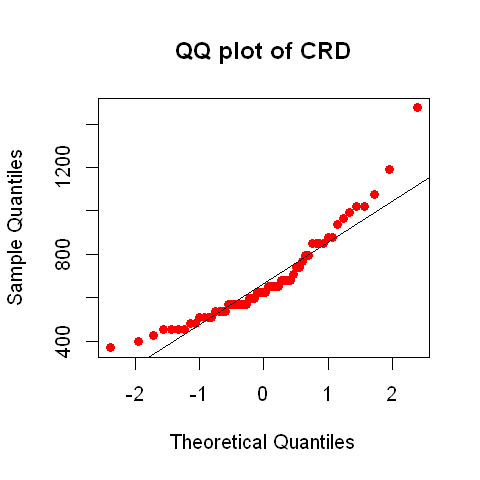

In [21]:
qqnorm(CRD$value,main="QQ plot of CRD",pch=19, col=2)

qqline(CRD$value, col=1)

#### To normalize data, we use different transformations such as arcsine,square roor, log, Box-cox, 
#### ANOVA of variance 

#### For right-skewed data-tail is on the right, positive skew-, common transformations include square root, cube root, and log.

#### For left-skewed data-tail is on the left, negative skew-, common transformations include square root (constant - x), cube root (constant - x), and log (constant - x).
#### Another approach is to use a general power transformation, such as Tukey's Ladder of Powers or a Box-Cox transformation
#### Here we will use some general transormations and ultimatey use box-cox transformation 



### perform transformations 

 #### 1) square root transformations

In [22]:
sqrtyld <-sqrt(CRD$value) 
sqrtyld

[1] 29.16333 21.29789 29.64540 24.97399 22.58982 27.66677 26.08448 24.39980
 [9] 23.20883 29.16333 28.17446 31.94683 26.62236 25.53527 24.97399 19.92235
[17] 26.08448 25.53527 23.20883 26.08448 22.58982 31.04674 25.53527 31.94683
[25] 29.64540 23.81176 23.20883 23.81176 22.58982 20.62159 23.81176 24.97399
[33] 23.20883 21.29789 21.95336 19.19766 23.81176 24.39980 23.81176 24.39980
[41] 31.50000 29.16333 38.39531 22.58982 28.17446 21.29789 30.58676 34.50652
[49] 21.95336 24.97399 32.82225 29.16333 26.08448 27.14959 27.14959 25.53527
[57] 23.81176 21.29789 25.53527 23.81176

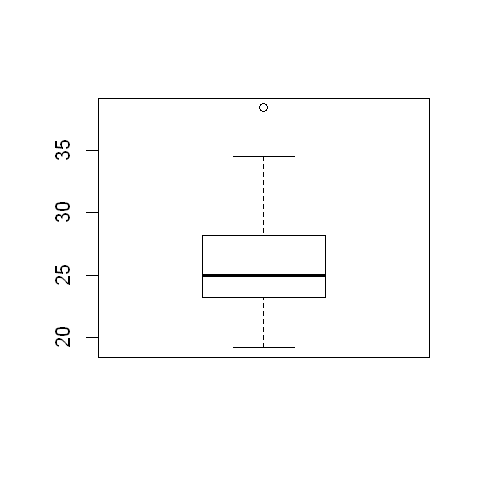

In [23]:
boxplot(sqrtyld)

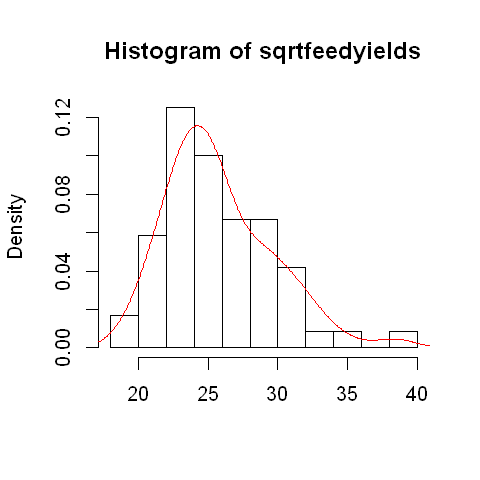

In [24]:
hist(sqrtyld,probability=T, main="Histogram of sqrtfeedyields",xlab=" ")
lines(density(sqrtyld),col=2) 

#### 2) Cube root transformations

[1]  9.474539  7.683475  9.578664  8.543948  7.991136  9.147567  8.795383
 [8]  8.412481  8.136461  9.474539  9.259134 10.068200  8.915883  8.671488
[15]  8.543948  7.348979  8.795383  8.671488  8.136461  8.795383  7.991136
[22]  9.878189  8.671488 10.068200  9.578664  8.276773  8.136461  8.276773
[29]  7.991136  7.519947  8.276773  8.543948  8.136461  7.683475  7.840324
[36]  7.169664  8.276773  8.412481  8.276773  8.412481  9.974100  9.474539
[43] 11.381132  7.991136  9.259134  7.683475  9.780379 10.599062  7.840324
[50]  8.543948 10.251299  9.474539  8.795383  9.033211  9.033211  8.671488
[57]  8.276773  7.683475  8.671488  8.276773

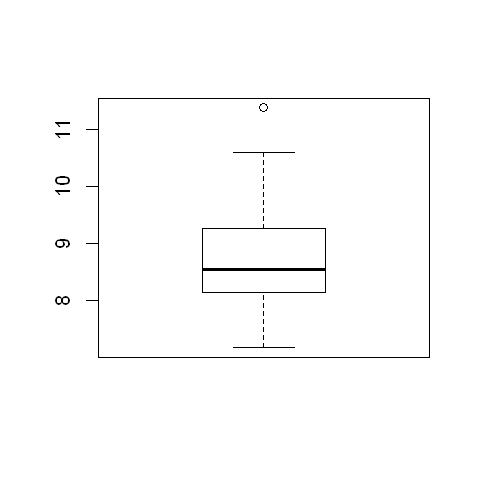

In [25]:
value_cub = sign(CRD$value) * abs(CRD$value)^(1/3) 
value_cub
boxplot(value_cub)

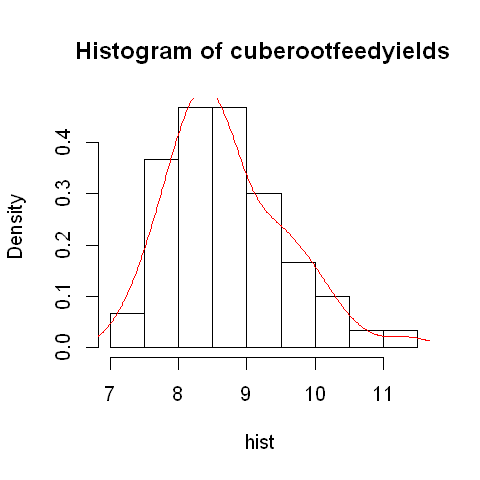

In [26]:
hist(value_cub,probability=T, main="Histogram of cuberootfeedyields",xlab="hist ")
lines(density(value_cub),col=2)

#### 2) Log transformations

[1] 6.745824 6.117216 6.778614 6.435669 6.234999 6.640464 6.522681 6.389149
 [9] 6.289066 6.745824 6.676832 6.928146 6.563503 6.480121 6.435669 5.983684
[17] 6.522681 6.480121 6.289066 6.522681 6.234999 6.870988 6.480121 6.928146
[25] 6.778614 6.340359 6.289066 6.340359 6.234999 6.052677 6.340359 6.435669
[33] 6.289066 6.117216 6.177840 5.909576 6.340359 6.389149 6.340359 6.389149
[41] 6.899975 6.745824 7.295871 6.234999 6.676832 6.117216 6.841135 7.082297
[49] 6.177840 6.435669 6.982213 6.745824 6.522681 6.602724 6.602724 6.480121
[57] 6.340359 6.117216 6.480121 6.340359

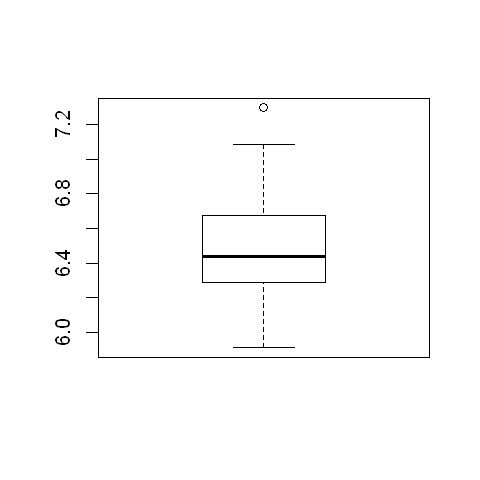

In [27]:
value_log = log(CRD$value)
value_log
boxplot(value_log)

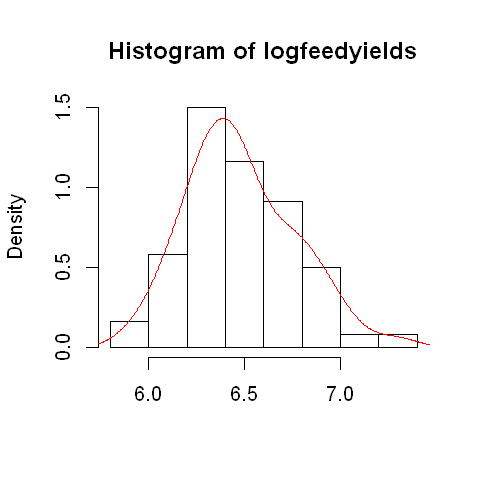

In [29]:
hist(value_log,probability=T, main="Histogram of logfeedyields",xlab=" ")
lines(density(value_log),col=2)

## box cox 




$x
  [1] -2.00000000 -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.79797980
  [7] -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.59595960 -1.55555556
 [13] -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 [19] -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 [25] -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 [31] -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 [37] -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 [43] -0.30303030 -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.10101010
 [49] -0.06060606 -0.02020202  0.02020202  0.06060606  0.10101010  0.14141414
 [55]  0.18181818  0.22222222  0.26262626  0.30303030  0.34343434  0.38383838
 [61]  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
 [67]  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
 [73]  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
 [79]  1.15151515  1.19191919  1.23232323  1.27272727  1.31313131  1.35353535
 [85]  1.39393939  1.43434343  1.47474747  1.51515152  1.55555556  1.59595960
 [91]  1.63636364  1.67676768  1.71717172  1.75757576  1.79797980  1.83838384
 [97]  1.87878788  1.91919192  1.95959596  2.00000000

$y
  [1] -50.47245 -50.17026 -49.87621 -49.59036 -49.31274 -49.04343 -48.78246
  [8] -48.52989 -48.28577 -48.05016 -47.82311 -47.60466 -47.39488 -47.19381
 [15] -47.00150 -46.81800 -46.64338 -46.47767 -46.32094 -46.17322 -46.03458
 [22] -45.90506 -45.78472 -45.67360 -45.57176 -45.47925 -45.39612 -45.32242
 [29] -45.25820 -45.20351 -45.15840 -45.12293 -45.09714 -45.08108 -45.07481
 [36] -45.07837 -45.09182 -45.11520 -45.14857 -45.19197 -45.24546 -45.30909
 [43] -45.38290 -45.46695 -45.56128 -45.66595 -45.78100 -45.90648 -46.04245
 [50] -46.18894 -46.34602 -46.51372 -46.69211 -46.88121 -47.08109 -47.29179
 [57] -47.51335 -47.74583 -47.98926 -48.24370 -48.50919 -48.78577 -49.07349
 [64] -49.37239 -49.68252 -50.00391 -50.33661 -50.68066 -51.03610 -51.40296
 [71] -51.78129 -52.17111 -52.57248 -52.98541 -53.40995 -53.84613 -54.29397
 [78] -54.75350 -55.22477 -55.70778 -56.20256 -56.70914 -57.22755 -57.75779
 [85] -58.29988 -58.85385 -59.41970 -59.99746 -60.58711 -61.18869 -61.80218
 [92] -62.42760 -63.06494 -63.71420 -64.37539 -65.04848 -65.73348 -66.43037
 [99] -67.13914 -67.85977

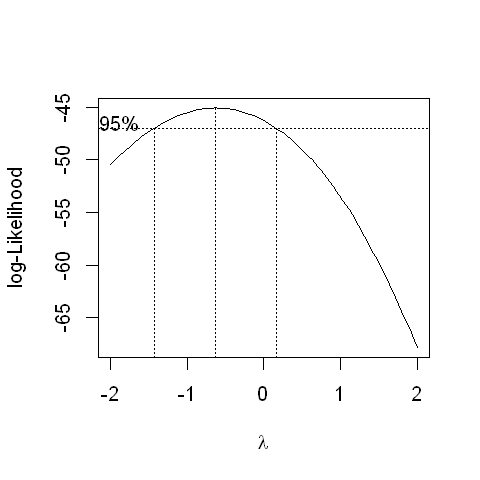

In [30]:
bc = boxcox(model)
bc

In [31]:
bc$y

[1] -50.47245 -50.17026 -49.87621 -49.59036 -49.31274 -49.04343 -48.78246
  [8] -48.52989 -48.28577 -48.05016 -47.82311 -47.60466 -47.39488 -47.19381
 [15] -47.00150 -46.81800 -46.64338 -46.47767 -46.32094 -46.17322 -46.03458
 [22] -45.90506 -45.78472 -45.67360 -45.57176 -45.47925 -45.39612 -45.32242
 [29] -45.25820 -45.20351 -45.15840 -45.12293 -45.09714 -45.08108 -45.07481
 [36] -45.07837 -45.09182 -45.11520 -45.14857 -45.19197 -45.24546 -45.30909
 [43] -45.38290 -45.46695 -45.56128 -45.66595 -45.78100 -45.90648 -46.04245
 [50] -46.18894 -46.34602 -46.51372 -46.69211 -46.88121 -47.08109 -47.29179
 [57] -47.51335 -47.74583 -47.98926 -48.24370 -48.50919 -48.78577 -49.07349
 [64] -49.37239 -49.68252 -50.00391 -50.33661 -50.68066 -51.03610 -51.40296
 [71] -51.78129 -52.17111 -52.57248 -52.98541 -53.40995 -53.84613 -54.29397
 [78] -54.75350 -55.22477 -55.70778 -56.20256 -56.70914 -57.22755 -57.75779
 [85] -58.29988 -58.85385 -59.41970 -59.99746 -60.58711 -61.18869 -61.80218
 [92] -62.42760 -63.06494 -63.71420 -64.37539 -65.04848 -65.73348 -66.43037
 [99] -67.13914 -67.85977

In [32]:
best.lam=bc$x[which(bc$y==max(bc$y))]
best.lam

[1] -0.6262626

In [33]:
lambda=(-0.62626262626)

### fit new linear regression model using the Box-Cox transformation

In [34]:
new_model <- lm(((value^lambda-1/lambda) ~ trt))

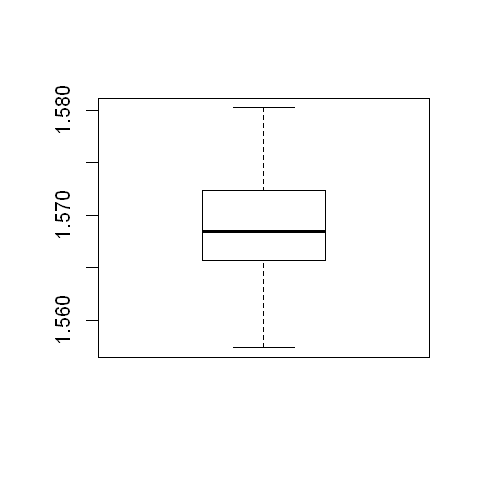

In [35]:
a=boxplot(((value^lambda-1)/lambda)) #~ trt, col=2)

# Q-Q plot for original model

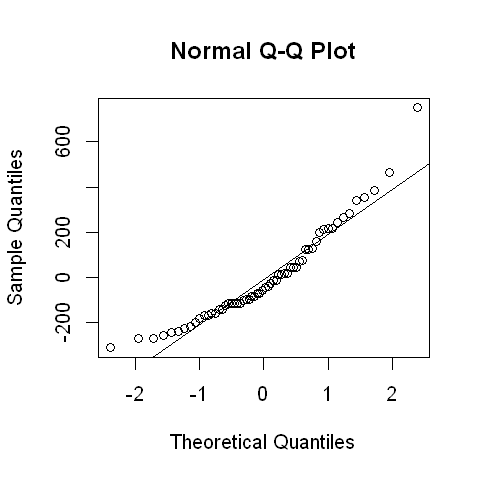

In [36]:
qqnorm(model$residuals)
qqline(model$residuals)

### Q-Q plot for Box-Cox transformed model 
### here you can see 


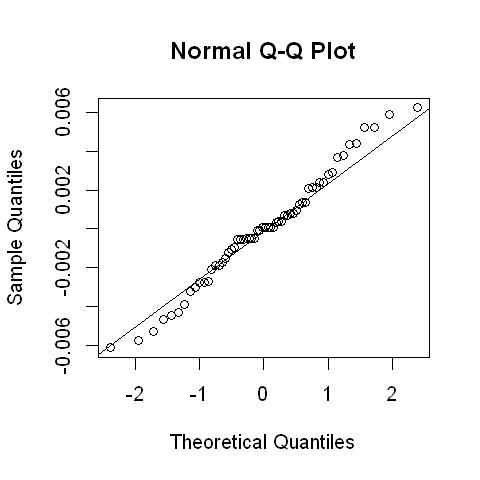

In [37]:
qqnorm(new_model$residuals)
qqline(new_model$residuals)

#### As a rule of thumb, if the data points fall along a straight diagonal line in a Q-Q plot then the dataset likely follows a normal distribution.
#### Notice how the box-cox transformed model produces a Q-Q plot with a much straighter line than the original regression model.


### ANOVA using box cox transformation

In [38]:
transformed_anova=aov(new_model)
summary(transformed_anova)

            Df    Sum Sq   Mean Sq F value Pr(>F)  
trt          2 0.0000545 2.724e-05   3.238 0.0466 *
Residuals   57 0.0004795 8.413e-06                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### ANOVA without transformation

In [39]:
anovacrd=lm(value~trt)
summary.aov(anovacrd)
summary(anovacrd)


            Df  Sum Sq Mean Sq F value Pr(>F)  
trt          2  271042  135521   3.304 0.0439 *
Residuals   57 2337788   41014                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
lm(formula = value ~ trt)

Residuals:
    Min      1Q  Median      3Q     Max 
-310.43 -122.26  -32.60   86.47  710.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   674.73      45.28  14.900   <2e-16 ***
trt2          -75.13      64.04  -1.173    0.246    
trt3           89.30      64.04   1.394    0.169    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.5 on 57 degrees of freedom
Multiple R-squared:  0.1039,	Adjusted R-squared:  0.07245 
F-statistic: 3.304 on 2 and 57 DF,  p-value: 0.04388
